In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from pyThermoML.core import DataReport

sns.set_context("talk")


# Analyse ThermoML

### Read in ThermoML xml file

In [2]:
# Read in existing thermoml file
datareport = DataReport().from_xml( open("files/j.jct.2012.08.025.xml","rb") )


### List compounds in the file

In [3]:
# Check exisiting components
ids = datareport.list_compounds()


The datareport contains the following compounds:

   1: carbon dioxide
   2: choline chloride
   3: glycerol


### List the reported properties

In [5]:
# Check all existing properties
prop_list = datareport.get_property_list( verbose = True )

"Molality, mol/kg" of carbon dioxide


### Gather all reported properties (including variables and constraints)

In [ ]:
# Check all existing data
all_data = datareport.get_all_data( verbose = True )

### Gather data for one property over the composition of one compound and a provided variable

In [4]:
# Extract molality data of carbon dioxide
molality_data = datareport.analysis_property( prop_name = "Molality",
                                              prop_identifier = "carbon dioxide"
                                            )

### Plot the extracted data

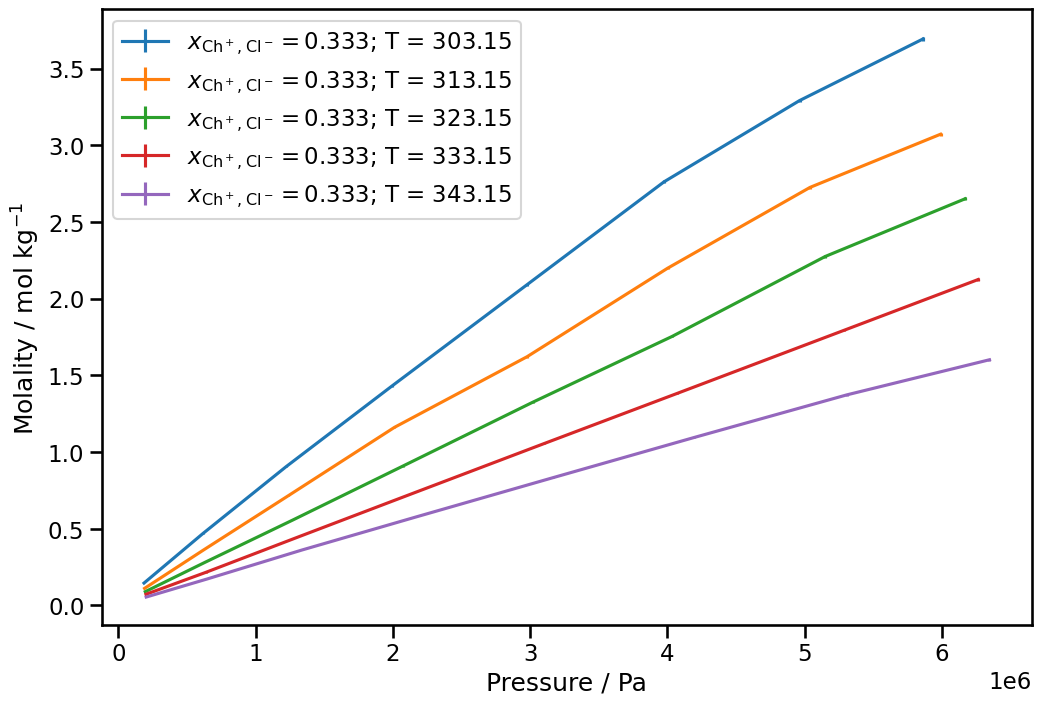

In [6]:
fig, ax = plt.subplots( figsize = (12,8) )

for _,df in molality_data.groupby("Solvent: Mole fraction of choline chloride"):

    for _, dff in df.groupby("Temperature, K"):
        ax.errorbar( dff["Pressure, kPa"]*1000, dff["mean"],dff["95_confidence"]/2, label=r'$x_\mathrm{Ch^+,Cl^-} =$' + f'{dff["Solvent: Mole fraction of choline chloride"].iloc[0]}; T = {dff['Temperature, K'].iloc[0]}' )

ax.legend()
ax.set_xlabel("Pressure / Pa")
ax.set_ylabel("Molality / mol kg$^{-1}$")
plt.show()

In [ ]:
#